In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

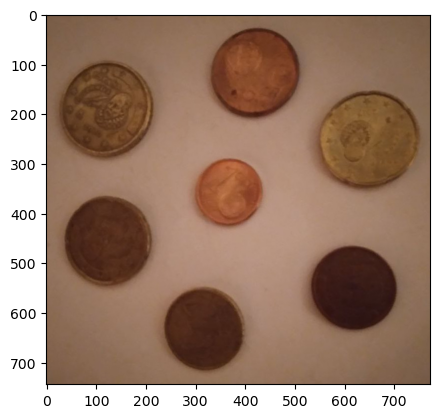

In [2]:
img_file = "archives/monedas.jpg"
img = cv.imread(img_file)
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img2)

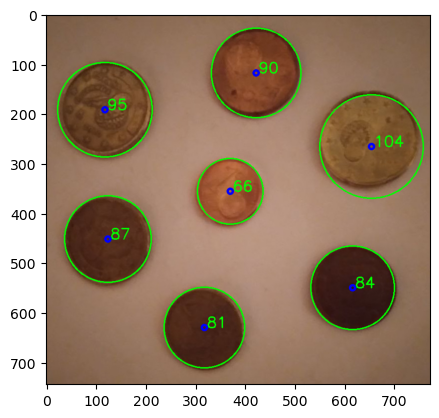

In [3]:
gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#gris = cv.cvtColor(img, cv.COLOR_BGR2HSV)[:,:,2].copy()
#plt.imshow(img3[:,:,1], cmap="gray")
# plt.imshow(gris, cmap="gray")
gris = cv.GaussianBlur(gris, (3,3), sigmaX=0, sigmaY=0)

circulos = cv.HoughCircles(gris, cv.HOUGH_GRADIENT, dp=1,
                           minDist=gris.shape[0]/10, param1=160, param2=10,
                           minRadius=50, maxRadius=150)
if circulos is not None:
  circulos = np.uint16(np.around(circulos))
  for circulo in circulos[0, :]:
    xcenter = circulo[0]
    ycenter = circulo[1]
    radio = circulo[2]
    cv.circle(img2, (xcenter, ycenter), radio, (0,255,0), 2)
    cv.circle(img2, (xcenter, ycenter), 5, (0,0,255), 3)
    cv.putText(img2, f"{radio}", (xcenter+5, ycenter),
               cv.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)


plt.imshow(img2)

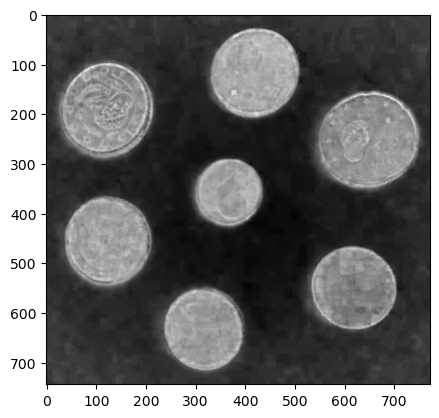

In [4]:
img3 = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plt.imshow(img3[:,:,1], cmap="gray")